 # Q1 Load data

In [1]:
import sys, os
sys.path.insert(1, os.path.join(sys.path[0], '..'))

from data import data_loader
import metpy

In [2]:
site1 = data_loader.get_site_1_data()
site2 = data_loader.get_site_2_data()

# Q2 Plot raw data
Note interesting features and compare and contrast

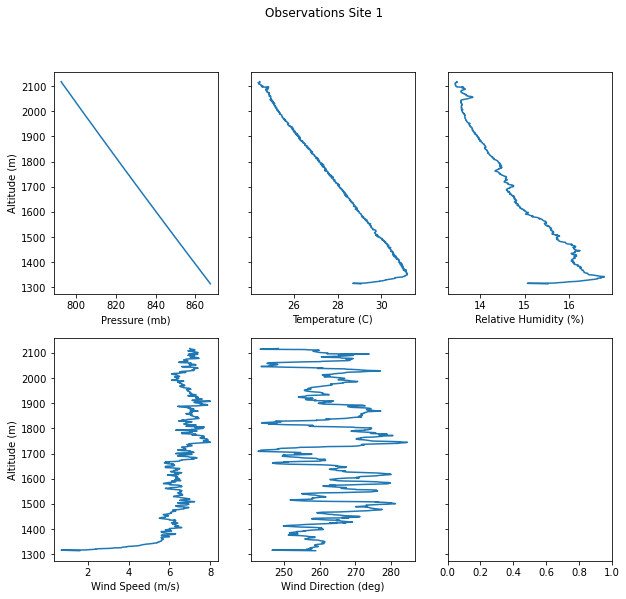

In [3]:
from visualization.visualize_source_data import plot_dataframe

plot_dataframe(site1, "Site 1")

### Interesting features:

- There's a sharp temperature inversion at the bottom layer (~1300 to 1400 m)
- The air is dry and overall humidity is declining, but in the inversion layer RH increases
- The inversion layer also has sharp vertical wind speed shear, but higher layers have higher direction shear (though all within about 40 degrees)

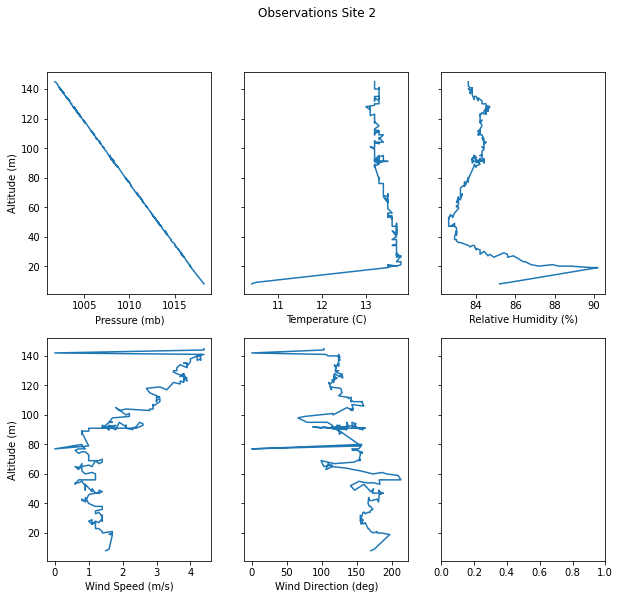

In [4]:
plot_dataframe(site2, "Site 2")

### Interesting features:

- As discussed in class, this balloon was ascending so slowly that it took dips up and down, resulting in the moise and loops we see in the data here
- Again we see a temperature inversion in the bottom layer (around 0 to 20 m) accompanied by different characteristics of relative humidity, wind speed, and shear. Overall we see less share and increasing RH in this layer.
- This air is very humid.

### Compare and contrast:

- The first dataset is at a higher altitude, whereas the second starts near sea level. Perhaps not surprisingly, the lower one is much moister. It's also colder, so it has an advantage given we're looking at RH instead of absolute humidity.
- Both have capping inversions over boundary layers where we see consistent wind shear and decline in both temperature and relative humidity.
- In both cases, wind speed increases above the boundary layer, though in the second one it looks like there's an outlier near the top of the data.
- The second dataset seems notably noisier.
- Even ignoring outliers, the direction shear in the second set is stronger (around 100 degrees vs 40 in the first). 
- The first dataset is about 900 m in altitude range, while the second is only about 140.

# Q3 Plot temperature, potential temperature, and virtual potential temperature

Compare and discuss the potential temperature and virtual potential temperatures. Why do they differ?

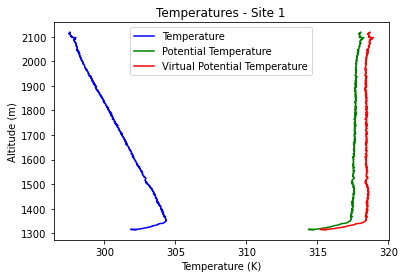

In [5]:
    from model import temperature
    from visualization.visualize_temperatures import plot_temperatures
    
    data_1 = data_loader.get_site_1_data()
    temperature.add_temp_columns(data_1)
    plot_temperatures(data_1, "Site 1")

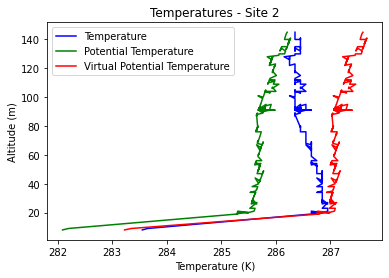

In [6]:
    data_2 = data_loader.get_site_2_data()
    temperature.add_temp_columns(data_2)
    plot_temperatures(data_2, "Site 2")

Potential temperature is the temperature the air would have if it descends/ascends adiabatically to 1000 hPa. In the first dataset, pressure level is much higher so this makes more of a difference. However, in the second dataset, we see that potential temperature is actually lower than actual temperature, which makes sense given the pressure is higher than 1000 hPa so to get to potential temperature, we imagine the parcel rising and therefore cooling. In both cases, we see that the boundary layer has increasing potential temperature--a stable environment, which makes sense given the capping inversion--and above that the potential temperature is roughly constant, a neutral environment.

Virtual potential temperature is just the potential temperature with the virtual temperature adjustment. Virtual temperature is the temperature a mass of completely dry air would have to be at to have the same density as the actual moist air in question. This means virtual potential temperature will always be as warm or warmer than the potential temperature, since water vapor molecules are light. There's a bigger difference between these two when mixing ratio is higher, so in this case Site 2 sees a bigger difference than Site 1.

# Q4 DALR-based potential temp estimation

What is the difference? Is there a bigger difference for one of the sites?

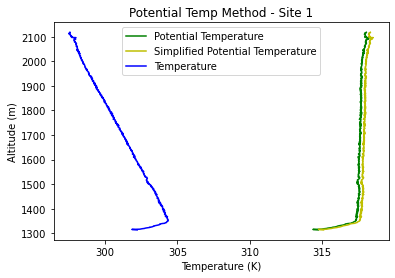

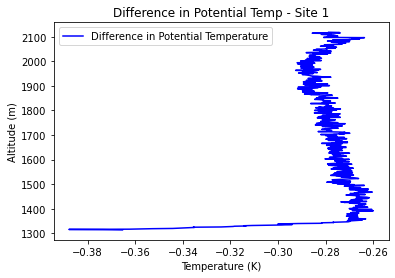

In [7]:
from visualization.visualize_temperatures import plot_potential_temp_diff, compare_potential_temp_methods

compare_potential_temp_methods(data_1, "Site 1")
plot_potential_temp_diff(data_1, "Site 1")

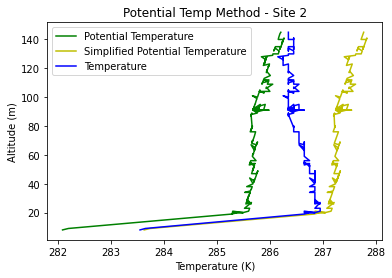

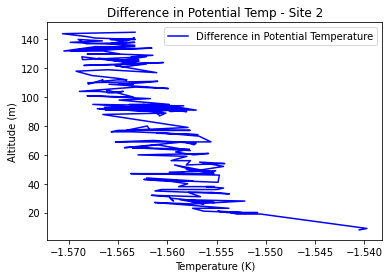

In [8]:
compare_potential_temp_methods(data_2, "Site 2")
plot_potential_temp_diff(data_2, "Site 2")

The difference is small, particularly for the first site, but a little larger for the second since we're going in the wrong direction--since z is positive, we're adding something to T to get theta_simple, but we're actually below the 1000 mb pressure surface so we should be subtracting. 

Since we're going in the wrong direction, the magnitude of error is large as we increase in height for Site 2. The opposite is true for Site 1, with errors getting smaller as we get higher, presumably due to any mismatch in surface conditions re: standard pressure level vs height are a smaller fraction of the total potential temperature adjustment to the temperature observations.

# Q6 Use the "bulk method" to calculate latent and sensible heat
Is the “drying-power” term important? Compare the results from the two sites.

Note: This code takes the lowest altitude as the surface and uses 20 m above that as the reference height.

In [13]:
from model.bulk_transfer import get_heat_fluxes
data = data_loader.get_site_1_data()
fluxes_1 = get_heat_fluxes(data)
print("Sensible heat: {:.2f} W/m^2".format(fluxes_1.sensible))
print("Latent heat: {:.2f} W/m^2".format(fluxes_1.latent))

Drying power: -8.91E-04
Sensible heat: -8.49 W/m^2
Latent heat: -11.63 W/m^2


In [14]:
data = data_loader.get_site_2_data()
fluxes_2 = get_heat_fluxes(data)
print("Sensible heat: {:.2f} W/m^2".format(fluxes_2.sensible))
print("Latent heat: {:.2f} W/m^2".format(fluxes_2.latent))

Drying power: -1.65E-03
Sensible heat: -6.13 W/m^2
Latent heat: -7.56 W/m^2


Drying power is small in absolute terms but actually significant when you consider that q is generally on the order of 10-3 anyway. Both datasets show a sharp rise in humidity from the ground. There is a good amount of latent heat flux, with more in Site 1. The direction is negative, or toward the surface.

In both cases, the surface is cold and as a result we have negative sensible heat flux. The first site has a higher magnitude of heat flux but they're on the same order.

# Q5 Calculate the Bowen ratio
Calculate the Bowen ratio in the lower 20 meters at each site assuming linear gradient approximations for the potential temperature and relative humidity. Compare the results from the two sites.

In [15]:
def bowen_ratio(fluxes):
    return fluxes.sensible/fluxes.latent

print("Bowen ratio for site 1: {:.2f}".format(bowen_ratio(fluxes_1)))
print("Bowen ratio for site 2: {:.2f}".format(bowen_ratio(fluxes_2)))

Bowen ratio for site 1: 0.73
Bowen ratio for site 2: 0.81


In both cases, there's somewhat more latent heat flux than sensible heat flux. While Site 2 has a higher drying power, it also has a much larger increase in temperature in the bottom 20 m, so its Bowen ratio is actually a little higher.

# Q7 Compare given heights and heights computed from hypsometric equation

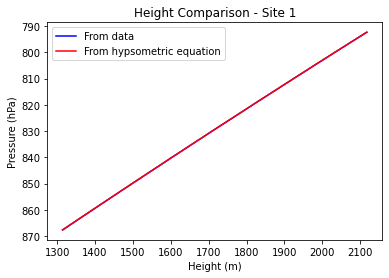

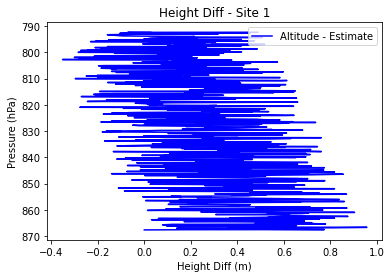

In [11]:
from visualization.visualize_heights import plot_estimated_vs_actual_height

plot_estimated_vs_actual_height(1)

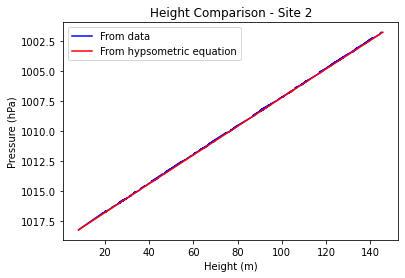

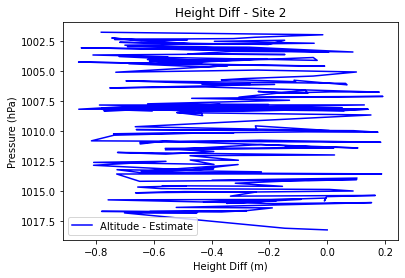

In [12]:
plot_estimated_vs_actual_height(2)

These are extremely close, never diverging by more than a meter in either dataset. In the first, there's a clearer trend of the estimate improving for most of the time with height, perhaps because the hypsometric height is cumulative and the noise in the data gets smoothed out. But the actual data itself is very noisy for Site 2, so you don't see that trend in the difference. In the first dataset, the estimates are biased to be a little lower than actual, and for the second, it's the opposite.